In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

In [4]:
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

In [5]:
def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

In [6]:
def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      


Task 1

In [7]:
# Task 1: Vary the number of qubits
for n_qubits in [2, 3, 4]:
    print(f"\nRunning QFT on {n_qubits} qubits...")
    run_qft(n_qubits)


Running QFT on 2 qubits...
                   ┌───┐    statevector 
q_0: ──────■───────┤ H ├─X───────░──────
     ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ┤ H ├─■─────────────X───────░──────
     └───┘                       ░      

Running QFT on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      

Running QFT on 4 qubits...
                                                                          ┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────

Task 2

In [9]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c7b510abbc62771632ac41a7b6ff59360e018984d73dcc6b64445c52963feb17
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [12]:
from qiskit import QuantumCircuit
import numpy as np

def inverse_qft(num_qubits):
    qc = QuantumCircuit(num_qubits)
    # Reverse swap order first
    for q in range(num_qubits // 2):
        qc.swap(q, num_qubits - q - 1)
    # Apply inverse rotations
    for j in range(num_qubits - 1, -1, -1):
        for k in range(j - 1, -1, -1):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    qc.name = "Inverse QFT"
    return qc

iqft = inverse_qft(3)
print(iqft.draw(output='text'))

                                      ┌───┐
q_0: ─X────────────■─────────■────────┤ H ├
      │            │         │P(-π/2) ├───┤
q_1: ─┼──■─────────┼─────────■────────┤ H ├
      │  │P(-π/2)  │P(-π/4)   ┌───┐   └───┘
q_2: ─X──■─────────■──────────┤ H ├────────
                              └───┘        


Task 3

In [13]:
from qiskit import QuantumCircuit
import numpy as np

def inverse_qft(num_ancillas):
    qc = QuantumCircuit(num_ancillas)
    for j in range(num_ancillas // 2):
        qc.swap(j, num_ancillas - j - 1)
    for j in range(num_ancillas - 1, -1, -1):
        for k in range(j - 1, -1, -1):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

def phase_estimation(unitary, ancillas):
    n_target = unitary.num_qubits
    qc = QuantumCircuit(ancillas + n_target)
    # Prepare ancilla register
    qc.h(range(ancillas))
    # Controlled-U^(2^k)
    for k in range(ancillas):
        qc.append(unitary.power(2 ** k).to_gate().control(1),
                  [k] + list(range(ancillas, ancillas + n_target)))
    # Apply inverse QFT
    qc.append(inverse_qft(ancillas).to_gate(), range(ancillas))
    qc.measure_all()
    return qc

# Example: 1-qubit unitary with known phase
phi = 1 / 4
U = QuantumCircuit(1)
U.p(2 * np.pi * phi, 0)

qpe_circuit = phase_estimation(U, 3)
print(qpe_circuit.draw(output='text'))

        ┌───┐                                                   ┌─────────────┐»
   q_0: ┤ H ├────────■──────────────────────────────────────────┤0            ├»
        ├───┤        │                                          │             │»
   q_1: ┤ H ├────────┼────────────────■─────────────────────────┤1 circuit-87 ├»
        ├───┤        │                │                         │             │»
   q_2: ┤ H ├────────┼────────────────┼────────────────■────────┤2            ├»
        └───┘┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐└─────────────┘»
   q_3: ─────┤ circuit-58**1 ├┤ circuit-58**2 ├┤ circuit-58**4 ├───────────────»
             └───────────────┘└───────────────┘└───────────────┘               »
meas: 4/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«         ░ ┌─┐         
«   q_0: ─░─┤M├─────────
«         ░ └╥┘┌─┐      
«   q_1: ─░──╫─┤M├──────
«        

Task 4

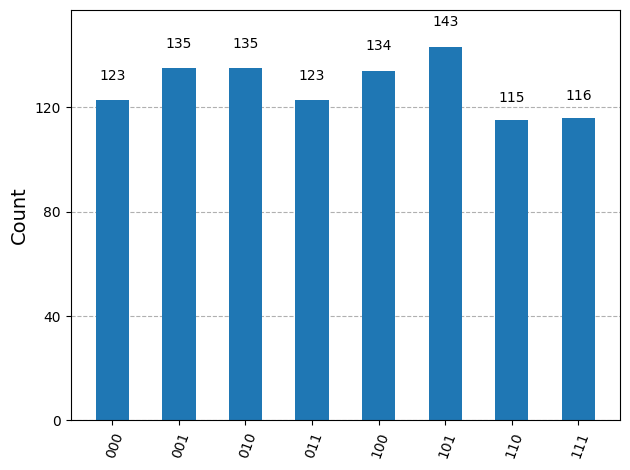

Measurement counts: {'001': 135, '110': 115, '101': 143, '010': 135, '000': 123, '100': 134, '111': 116, '011': 123}


In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qft_circuit(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        for j in range(i + 1, n):
            qc.cp(np.pi / 2 ** (j - i), j, i)
    qc.measure_all()
    return qc

def run_qft_with_measurement(n):
    sim = AerSimulator()
    qc = qft_circuit(n)
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()
    plt1 = plot_histogram(counts)
    display(plt1)
    plt.show()
    print("Measurement counts:", counts)

run_qft_with_measurement(3)

Task 5

In [17]:
# Task 5: Circuit Visualization (without mpl)

# Create a 3-qubit QFT circuit
qc = qft_circuit(3)

# Print the circuit in plain-text format
print("\nQFT Circuit (Text Representation):")
print(qc.draw(output='text'))

# If you want to visualize for other qubit counts:
for n in [2, 3, 4]:
    print(f"\nQFT Circuit for {n} qubits:")
    print(qft_circuit(n).draw(output='text'))


QFT Circuit (Text Representation):
        ┌───┐                                      ░ ┌─┐      
   q_0: ┤ H ├─■────────■───────────────────────────░─┤M├──────
        └───┘ │P(π/2)  │       ┌───┐               ░ └╥┘┌─┐   
   q_1: ──────■────────┼───────┤ H ├─■─────────────░──╫─┤M├───
                       │P(π/4) └───┘ │P(π/2) ┌───┐ ░  ║ └╥┘┌─┐
   q_2: ───────────────■─────────────■───────┤ H ├─░──╫──╫─┤M├
                                             └───┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════════════════╩══╩══╩═
                                                      0  1  2 

QFT Circuit for 2 qubits:
        ┌───┐               ░ ┌─┐   
   q_0: ┤ H ├─■─────────────░─┤M├───
        └───┘ │P(π/2) ┌───┐ ░ └╥┘┌─┐
   q_1: ──────■───────┤ H ├─░──╫─┤M├
                      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════╩══╩═
                               0  1 

QFT Circuit for 3 qubits:
        ┌───┐                                      ░ ┌─┐      
   q_0: ┤ H ├─■──────